In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import feather
from datetime import date, datetime
import joblib

In [80]:
data_path = '/Volumes/FileStorage/Insight_data/'
ohio_path = '/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/'

In [81]:
oh_df=feather.read_dataframe('/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/oh_census_df.feather')

In [89]:
for key in oh_df:
    print(key)

SOS_VOTERID
COUNTY_NUMBER
COUNTY_ID
LAST_NAME
FIRST_NAME
MIDDLE_NAME
SUFFIX
DATE_OF_BIRTH
REGISTRATION_DATE
VOTER_STATUS
PARTY_AFFILIATION
RESIDENTIAL_ADDRESS1
RESIDENTIAL_SECONDARY_ADDR
RESIDENTIAL_CITY
RESIDENTIAL_STATE
RESIDENTIAL_ZIP
RESIDENTIAL_ZIP_PLUS4
RESIDENTIAL_COUNTRY
RESIDENTIAL_POSTALCODE
MAILING_ADDRESS1
MAILING_SECONDARY_ADDRESS
MAILING_CITY
MAILING_STATE
MAILING_ZIP
MAILING_ZIP_PLUS4
MAILING_COUNTRY
MAILING_POSTAL_CODE
CAREER_CENTER
CITY
CITY_SCHOOL_DISTRICT
COUNTY_COURT_DISTRICT
CONGRESSIONAL_DISTRICT
COURT_OF_APPEALS
EDU_SERVICE_CENTER_DISTRICT
EXEMPTED_VILL_SCHOOL_DISTRICT
LIBRARY
LOCAL_SCHOOL_DISTRICT
MUNICIPAL_COURT_DISTRICT
PRECINCT_NAME
PRECINCT_CODE
STATE_BOARD_OF_EDUCATION
STATE_REPRESENTATIVE_DISTRICT
STATE_SENATE_DISTRICT
TOWNSHIP
VILLAGE
WARD
PRIMARY-03/07/2000
GENERAL-11/07/2000
SPECIAL-05/08/2001
GENERAL-11/06/2001
PRIMARY-05/07/2002
GENERAL-11/05/2002
SPECIAL-05/06/2003
GENERAL-11/04/2003
PRIMARY-03/02/2004
GENERAL-11/02/2004
SPECIAL-02/08/2005
PRIMARY-05

In [141]:
oh_df[oh_df['PRECINCT_NAME']=='JACKSON A'].groupby(['PRECINCT_NAME','STATE_REPRESENTATIVE_DISTRICT']).sum()

COUNTY_NUMBER     COUNTY_ID  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                                
JACKSON A     4                                       1920     401746681   
              88                                     45864  295297776482   

                                             RESIDENTIAL_ZIP_PLUS4  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                          
JACKSON A     4                                          1292290.0   
              88                                         1667100.0   

                                             RESIDENTIAL_COUNTRY  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                        
JACKSON A     4                                              0.0   
              88                                             0.0   

                                             RESIDENTIAL_POSTALCODE  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                           
JACKSON A     4                                                 0.0   
              88                                                0.0   

                                             MAILING_ZIP  MAILING_ZIP_PLUS4  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                                   
JACKSON A     4                                 595789.0            16925.0   
              88                                164870.0                0.0   

                                             CONGRESSIONAL_DISTRICT  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                           
JACKSON A     4                                                3840   
              88                                               2548   

                                             COURT_OF_APPEALS  LIBRARY  ...  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                             ...   
JACKSON A     4                                          2880      0.0  ...   
              88                                         3822      0.0  ...   

                                             N_VOTED_ELIGIBLE_2016  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                          
JACKSON A     4                                               7603   
              88                                              4794   

                                             N_ELIGIBLE_2016  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                    
JACKSON A     4                                        29536   
              88                                       18864   

                                             N_VOTED_ELIGIBLE_2020  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                          
JACKSON A     4                                               7461   
              88                                              4557   

                                             N_ELIGIBLE_2020  RATIO_2012  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                                
JACKSON A     4                                        27374  207.182034   
              88                                       17882  135.420970   

                                             RATIO_2016  RATIO_2020  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                           
JACKSON A     4                              196.819854  246.424772   
              88                             132.128259  147.954357   

                                             HC01_EST_VC13  HC02_EST_VC17  \
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                                 
JACKSON A     4                                 45677073.0        85688.5   
              88                                35506145.0        57605.4   

                                             HC02_EST_VC18  
PRECINCT_NAME STATE_REPRESENTATIVE_DISTRICT                 
JACKSON A     4                                    13938.6  
              88                                    8900.7  

[2 rows x 34 column

In [9]:
model = joblib.load('logreg_fulldata_census.joblib')

In [10]:
features=['PARTY_AFFILIATION','STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME','AGE_2020','GENERAL-11/08/2016','RATIO_2020','HC02_EST_VC17','HC02_EST_VC18']
model_features=['AGE_2020','GENERAL-11/08/2016','RATIO_2020','HC02_EST_VC17','HC02_EST_VC18']

In [11]:
df_X=oh_df.loc[:, features]

In [12]:
df_X['PARTY_AFFILIATION']=df_X['PARTY_AFFILIATION'].fillna('N')

In [13]:
df_X.groupby('PARTY_AFFILIATION').size()

PARTY_AFFILIATION
D    1338397
G       6775
L         23
N    4563298
R    1916892
dtype: int64

In [14]:
N=4563298
D=1338397
G=6775
L=23
R=1916892

tot_p=N+D+G+L+R

In [15]:
tot_p

7825385

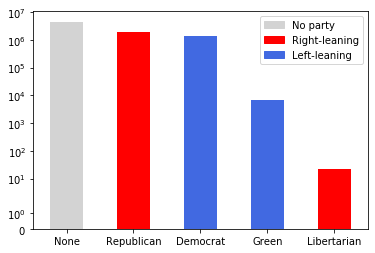

In [16]:
import matplotlib.patches as mpatches

s=pd.Series([N,R,D,G,L],index=['None','Republican','Democrat','Green','Libertarian'])
c=['lightgrey','red','royalblue','royalblue','red']
s.plot(kind='bar',color=c)
plt.xticks(rotation=360)
nopref=mpatches.Patch(color='lightgrey', label='No party')
right=mpatches.Patch(color='red',label='Right-leaning')
left=mpatches.Patch(color='royalblue',label='Left-leaning')
plt.legend(handles=[nopref,right,left])
axes = plt.gca()
plt.yscale('symlog')
#axes.set_ylim([0,ymax])
plt.show()

In [17]:
df_X_model=oh_df.loc[:, model_features]

In [18]:
df_Y_model=model.predict(df_X_model)

In [19]:
df_Y_model.shape

(7825385,)

In [20]:
df_results=df_X
df_results['2020_pred']=df_Y_model

In [21]:
df_results.head()

,PARTY_AFFILIATION,STATE_REPRESENTATIVE_DISTRICT,PRECINCT_NAME,AGE_2020,GENERAL-11/08/2016,RATIO_2020,HC02_EST_VC17,HC02_EST_VC18,2020_pred
0,N,82,PRECINCT ST. MARYS 3A,50,-1,0.057143,90.5,15.7,-1
1,N,53,MONROE 2,45,0,0.257143,94.9,35.4,0
2,N,9,CLEVELAND-02-Q,49,-1,0.000000,78.6,9.9,-1
3,N,65,MIAMI TOWNSHIP X,47,0,0.171429,94.9,46.6,0
4,N,12,CLEVELAND-01-E,45,0,0.333333,85.5,14.0,0


In [22]:
feather.write_dataframe(df_results,'/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/results.feather')
feather.write_dataframe(df_results,'/Users/kristinalooper/WorkArea/insight/results.feather')

In [63]:
df_results = feather.read_dataframe('/Volumes/FileStorage/Insight_data/Ohio_data/data_feather/results.feather')

In [64]:
df_results['2020_pred'].replace(-1, np.nan,inplace=True)
df_results['2020_pred'].replace(0,1,inplace=True)

In [65]:
prec_votes = df_results.groupby(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])['2020_pred'].sum()

In [71]:
sorted_votes=prec_votes.reset_index().sort_values(['STATE_REPRESENTATIVE_DISTRICT','2020_pred'],ascending=[True,False]).set_index(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])

In [75]:
#sorted_votes=sorted_votes.reset_index().set_index(['STATE_REPRESENTATIVE_DISTRICT','PRECINCT_NAME'])
sorted_votes.index.get_level_values(1)

Index(['WOOSTER CITY 4-C', 'WOOSTER CITY 3-C', 'WOOSTER CITY 4-D',
       'ORRVILLE CITY 3', 'WAYNE TWP 1', 'SUGAR CREEK TWP 1',
       'SUGAR CREEK TWP 2', 'SUGAR CREEK TWP 3 DALTON', 'CHESTER TWP 1',
       'RITTMAN CITY 3',
       ...
       'PRECINCT ASHTABULA 3-B', 'PRECINCT ASHTABULA 2-D',
       'PRECINCT ASHTABULA 4-B', 'PRECINCT ASHTABULA 3-C',
       'PRECINCT ASHTABULA 4-A', 'PRECINCT CONNEAUT 4-C',
       'PRECINCT ASHTABULA 5-A', 'PRECINCT ASHTABULA 5-B',
       'PRECINCT AQUILLA VILLAGE', 'PRECINCT ASHTABULA 3-A'],
      dtype='object', name='PRECINCT_NAME', length=9063)

In [76]:
#sorted_votes['2020_pred'].nlargest(3)
top_sorted=sorted_votes['2020_pred'].groupby(level='STATE_REPRESENTATIVE_DISTRICT').nlargest(3).reset_index(level=0, drop=True).reset_index(level=1)
#top_sorted=sorted_votes.groupby('STATE_REPRESENTATIVE_DISTRICT')['2020_pred'].nlargest(3)

In [143]:
top_sorted.loc[top_sorted['PRECINCT_NAME'].str.contains('AMANDA E')]

,PRECINCT_NAME,2020_pred
STATE_REPRESENTATIVE_DISTRICT,,
4,AMANDA E,822.0


In [28]:
top_dict=dict(top_sorted.groupby('STATE_REPRESENTATIVE_DISTRICT')['PRECINCT_NAME'].apply(list))

In [142]:
top_dict[4]

['JACKSON A', 'AMANDA E', 'MARION A']

In [30]:
party_df=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size()
#party_dict=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().to_dict()
#party_sort=df_results.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().reset_index()#.set_index(['PRECINT_NAME','PARTY_AFFILIATION'])


In [31]:
df_test = df_results
df_test.head(10)

,PARTY_AFFILIATION,STATE_REPRESENTATIVE_DISTRICT,PRECINCT_NAME,AGE_2020,GENERAL-11/08/2016,RATIO_2020,HC02_EST_VC17,HC02_EST_VC18,2020_pred
0,N,82,PRECINCT ST. MARYS 3A,50,-1,0.057143,90.5,15.7,NaN
1,N,53,MONROE 2,45,0,0.257143,94.9,35.4,1.0
2,N,9,CLEVELAND-02-Q,49,-1,0.000000,78.6,9.9,NaN
3,N,65,MIAMI TOWNSHIP X,47,0,0.171429,94.9,46.6,1.0
4,N,12,CLEVELAND-01-E,45,0,0.333333,85.5,14.0,1.0
5,D,16,NORTH OLMSTED-02-C,41,0,0.228571,92.1,29.8,1.0
6,N,65,WAYNE TOWNSHIP B,77,0,0.257143,87.8,13.8,1.0
7,R,64,PRECINCT WMSFLD TWP 2,77,0,0.344828,85.1,10.5,1.0
8,N,65,MIAMI TOWNSHIP L1L,48,-1,0.074074,94.9,46.6,1.0
9,N,12,PEPPER PIKE-00-D,28,0,0.200000,95.7,48.2,1.0


In [32]:
#df = df.groupby(['A', 'B']).size().reset_index(name='Size')
df_test=df_test.groupby(['PRECINCT_NAME','PARTY_AFFILIATION']).size().reset_index(name='Size')

In [33]:
df_test.head(10)

,PRECINCT_NAME,PARTY_AFFILIATION,Size
0,ABERDEEN VILLAGE,D,136
1,ABERDEEN VILLAGE,G,1
2,ABERDEEN VILLAGE,N,667
3,ABERDEEN VILLAGE,R,292
4,ADA NORTH,D,133
5,ADA NORTH,G,2
6,ADA NORTH,N,794
7,ADA NORTH,R,232
8,ADA SOUTH,D,102
9,ADA SOUTH,G,1


In [34]:
party_rows=df_test.set_index(['PRECINCT_NAME', 'PARTY_AFFILIATION']).unstack(['PARTY_AFFILIATION'])

In [35]:
party_rows=party_rows.reset_index()

In [36]:
party_rows=party_rows.fillna(0)

In [38]:
def party_lean(row):
    d=row[('Size', 'D')]
    g=row[('Size', 'G')]
    l=row[('Size', 'L')]
    r=row[('Size', 'R')]
    
    left=d+g
    right=r+l
    if right+left == 0:
        return "neutral"
    right_lean=right/(right+left)
    left_lean=1-right_lean
    if abs(right_lean-left_lean) < 0.05:
        return "neutral"
    elif right_lean > left_lean:
        return "right"
    else:
        return "left"

In [39]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [40]:
#oh_train['N_ELIGIBLE_2012'] = oh_train.progress_apply(lambda row: n_eligible(row,date_2000,date_2012), axis=1)
party_rows['Lean']=party_rows.progress_apply(lambda row: party_lean(row),axis=1)

In [41]:
d=('Size', 'D')

In [42]:
for key in party_rows:
    print(key)

('PRECINCT_NAME', '')
('Size', 'D')
('Size', 'G')
('Size', 'L')
('Size', 'N')
('Size', 'R')
('Lean', '')


In [43]:
party_dict_df=party_rows.drop([('Size', 'D'),('Size', 'G'),('Size', 'L'),('Size', 'N'),('Size', 'R')],axis=1)

In [44]:
party_dict=dict(zip(party_dict_df.PRECINCT_NAME,party_dict_df.Lean))

In [48]:
with open('results_dict.pickle', 'wb') as handle:
    pickle.dump(top_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
with open('party_dict.pickle','wb') as handle:
    pickle.dump(party_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
import geopandas as gpd
from matplotlib.figure import Figure

In [3]:
fp = "/Volumes/FileStorage/Insight_data/cb_2018_39_sldl_500k/cb_2018_39_sldl_500k.shp"
static_dir='/Users/kristinalooper/WorkArea/insight/canvassohio/canvassohio/static/'
fp_prec = "/Volumes/FileStorage/Insight_data/shp/precincts_results.shp"

with open('../canvassohio/static/results_dict.pickle','rb') as handle:
    top_dict = pickle.load(handle)
    


In [7]:
prec_df = gpd.read_file(fp_prec)
map_df = gpd.read_file(fp)

In [8]:
map_df=map_df.to_crs(prec_df.crs)

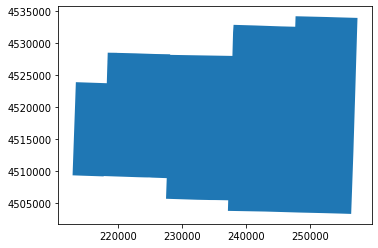

In [9]:
test_df=map_df[map_df.NAME=='4']
test_df.plot()

In [11]:
map_df = map_df[map_df.geometry.notnull()]
prec_df = prec_df[prec_df.geometry.notnull()]

([], <a list of 0 Text yticklabel objects>)

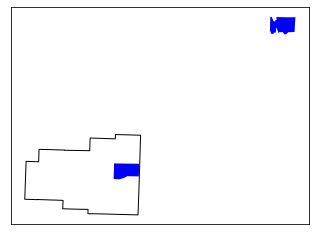

In [12]:
fig = Figure()
base = test_df.plot(color='white',edgecolor='black')
ptest_df.plot(ax=base, color='blue', figsize=(12, 12))
plt.xticks([])
plt.yticks([])

In [13]:
ptest_1=prec_df[prec_df.PRECINCT_e=='WOOSTER CITY 4-C']
ptest_2=prec_df[prec_df.PRECINCT_e=='WOOSTER CITY 3-C']
ptest_3=prec_df[prec_df.PRECINCT_e=='WOOSTER CITY 4-D']

([], <a list of 0 Text yticklabel objects>)

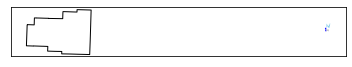

In [14]:
fig = Figure()
base = test_df.plot(color='white',edgecolor='black')
ptest_1.plot(ax=base, color='blue', figsize=(12, 12))
ptest_2.plot(ax=base, color='skyblue', figsize=(12, 12))
ptest_3.plot(ax=base, color='silver', figsize=(12, 12))
plt.xticks([])
plt.yticks([])

In [183]:
prec_df[(prec_df.PRECINCT_e==top_dict[key][0]) & (prec_df.county_nam=='Allen')]

,fid,PRECINCT,COUNTY,global_id,COUNTYGEOI,PRECINCT_e,PRECINCTCO,PRECINCT_m,county_nam,precinct_c,...,pres_16__3,pres_16_ev,pres_16_mo,pres_16__4,pres_16__5,pres_16_ji,pres_16__6,pres_16_do,pres_16__7,geometry
2610,2611.0,Jackson A,allen,3924.0,39003.0,JACKSON A,AEN,None,Allen,AEN,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,679.0,"POLYGON ((257108.6281311005 4522759.843866574,..."


4
['JACKSON A', 'AMANDA E', 'MARION A']
district_4.png


<Figure size 432x288 with 0 Axes>

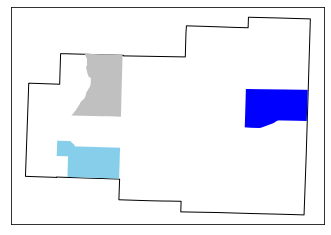

In [17]:
img_path='/Users/kristinalooper/WorkArea/insight/test_images/'
#for key in top_dict:
for key in range(4,5):
    print(key)
    plt.clf()
    print(top_dict[key])
    district_df=map_df[map_df.NAME==str(key)]
    if key == 4:
        precdf_0 = prec_df[(prec_df.PRECINCT_e==top_dict[key][0]) & (prec_df.county_nam=='Allen')]
    else:
        precdf_0=prec_df[prec_df.PRECINCT_e==top_dict[key][0]]
    precdf_1=prec_df[prec_df.PRECINCT_e==top_dict[key][1]]
    precdf_2=prec_df[prec_df.PRECINCT_e==top_dict[key][2]]
    base = district_df.plot(color='white',edgecolor='black')
    precdf_0.plot(ax=base, color='blue', figsize=(12, 12))
    precdf_1.plot(ax=base, color='skyblue', figsize=(12, 12))
    precdf_2.plot(ax=base, color='silver', figsize=(12, 12))
    plt.xticks([])
    plt.yticks([])
    fname='district_'+str(key)+'.png'
    print(fname)
    plt.savefig(img_path+fname)

In [3]:
with open('/Users/kristinalooper/WorkArea/insight/canvassohio/canvassohio/static/party_dict.pickle','rb') as handle:
    testing_dict = pickle.load(handle)

In [7]:
for keys in testing_dict:
    print(testing_dict[keys])

right
right
right
right
right
right
right
right
right
left
left
left
left
right
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
neutral
left
left
left
neutral
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
right
left
left
left
left
left
neutral
left
neutral
left
left
left
neutral
left
left
left
neutral
left
left
left
neutral
left
left
left
neutral
right
neutral
right
right
right
right
right
right
right
left
neutral
right
left
left
left
left
right
right
right
right
right
right
right
right
right
right
right
right
right
right
neutral
right
neutral
right
right
right
right
right

left
left
left
neutral
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
right
left
left
left
left
left
left
left
left
right
right
right
right
right
right
right
right
right
left
left
right
right
neutral
right
right
left
left
left
left
left
left
left
right
r

left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
neutral
left
left
left
right
neutral
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
neutral
left
left
left
left
neutral
left
left
left
left
left
left
left
left
left
left
left
neutral
neutral
neutral
left
left
neutral
left
left
left
left
left
neutral
left
neutral
neutral
right
right
left
left
neutral
neutral
left
right
left
left
neutral
left
neutral
right
neutral
left
left
left
left
left
left
left
neutral
left
neutral
left
left
left
left
left
left
left
left
left
left
left
left
left
right
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
neutral
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
neutral
neutral
left
neutral
right
left
neutral
left
left
left